In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [25]:
data = pd.read_csv('C:/Users/byash/OneDrive/Desktop/python scripts/Traffic_Crashes_-_Crashes.csv')
data.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


In [87]:
data.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

In [121]:
data['CRASH_TYPE']

0         INJURY AND / OR TOW DUE TO CRASH
1                   NO INJURY / DRIVE AWAY
2                   NO INJURY / DRIVE AWAY
3                   NO INJURY / DRIVE AWAY
4         INJURY AND / OR TOW DUE TO CRASH
                        ...               
794951              NO INJURY / DRIVE AWAY
794952              NO INJURY / DRIVE AWAY
794953              NO INJURY / DRIVE AWAY
794954    INJURY AND / OR TOW DUE TO CRASH
794955              NO INJURY / DRIVE AWAY
Name: CRASH_TYPE, Length: 784611, dtype: object

In [27]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values.sort_values(ascending=True, inplace=True)
print(missing_values)



CRASH_RECORD_ID                       0
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
WEATHER_CONDITION                     0
DEVICE_CONDITION                      0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
CRASH_TYPE                            0
TRAFFICWAY_TYPE                       0
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
DAMAGE                                0
STREET_NO                             0
DATE_POLICE_NOTIFIED                  0
CRASH_MONTH                           0
NUM_UNITS                             0
CRASH_DAY_OF_WEEK                     0
CRASH_HOUR                            0
STREET_NAME                           1
STREET_DIRECTION                      4
BEAT_OF_OCCURRENCE                    5


In [28]:

numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
string_cols = data.select_dtypes(include=['object', 'string']).columns

# Fill numeric columns with 0
data[numeric_cols] = data[numeric_cols].fillna(0)

# Fill string columns with 'N'
data[string_cols] = data[string_cols].fillna('N')


In [29]:
missing_values = data.isnull().sum()
missing_values.sort_values(ascending=True, inplace=True)
print(missing_values)

CRASH_RECORD_ID                  0
CRASH_DATE_EST_I                 0
CRASH_DATE                       0
POSTED_SPEED_LIMIT               0
TRAFFIC_CONTROL_DEVICE           0
DEVICE_CONDITION                 0
WEATHER_CONDITION                0
LIGHTING_CONDITION               0
FIRST_CRASH_TYPE                 0
TRAFFICWAY_TYPE                  0
LANE_CNT                         0
ALIGNMENT                        0
ROADWAY_SURFACE_COND             0
ROAD_DEFECT                      0
REPORT_TYPE                      0
CRASH_TYPE                       0
INTERSECTION_RELATED_I           0
NOT_RIGHT_OF_WAY_I               0
HIT_AND_RUN_I                    0
DAMAGE                           0
DATE_POLICE_NOTIFIED             0
PRIM_CONTRIBUTORY_CAUSE          0
SEC_CONTRIBUTORY_CAUSE           0
STREET_NO                        0
STREET_DIRECTION                 0
STREET_NAME                      0
BEAT_OF_OCCURRENCE               0
PHOTOS_TAKEN_I                   0
STATEMENTS_TAKEN_I  

The data we have is from 2013 to 2024. But the data provided for the years 2013, 2014 and 2015 are very low, 2, 6 and 5000 respecively. These low numbers will cause inconsistancies in Seasonality plot and hinder the patterns. Hence for that we will be removing those years 

In [31]:
# Extract features from CRASH_DATE
#data['CRASH_DATE'] = pd.to_datetime(data['CRASH_DATE'])
data['TIME'] = data['CRASH_DATE'].dt.time


In [44]:
data = data[~((data['CRASH_DATE'].dt.year == 2013) | (data['CRASH_DATE'].dt.year == 2014) | (data['CRASH_DATE'].dt.year == 2015)|(data['CRASH_DATE'].dt.year == 2024))]
data['CRASH_DATE'].dt.year.value_counts()

CRASH_DATE
2018    118950
2019    117762
2023    110560
2021    108763
2022    108401
2020     92092
2017     83786
2016     44297
Name: count, dtype: int64

### MONTHLY CRASHES

In [45]:
Yearly_data = data['CRASH_DATE'].dt.year.value_counts().sort_index()
Yearly_data

CRASH_DATE
2016     44297
2017     83786
2018    118950
2019    117762
2020     92092
2021    108763
2022    108401
2023    110560
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of accidents per month')

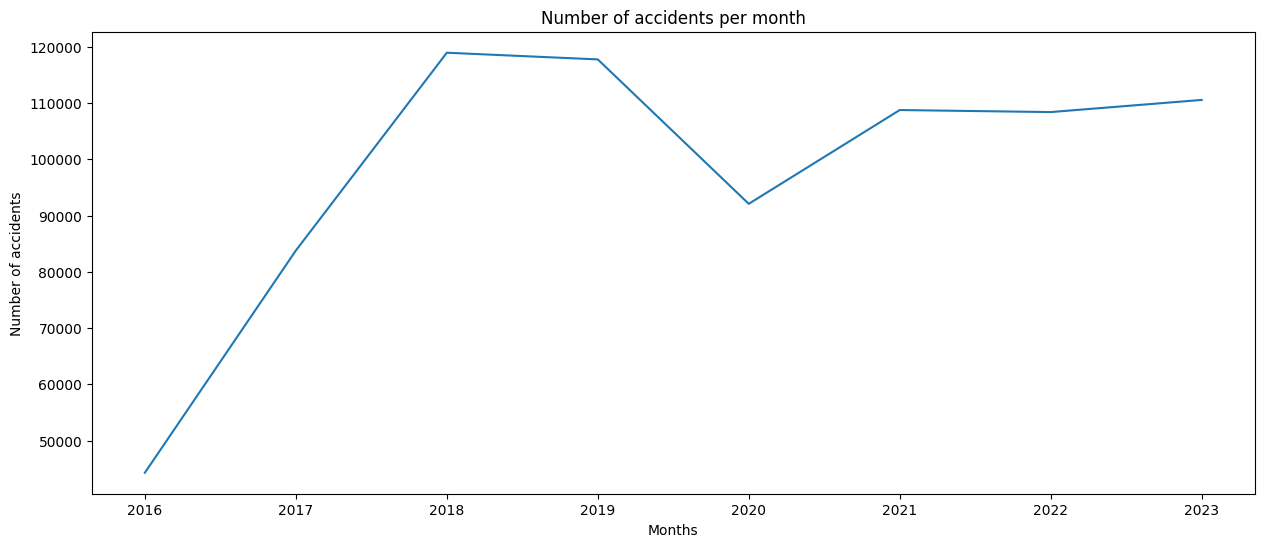

In [ ]:
plt.figure(figsize = (15,6))
plt.plot(Yearly_data.index,Yearly_data.values)
plt.xlabel('Years')
plt.ylabel('Number of accidents')
plt.title('Number of accidents per year')



# EXPLAIN WHY

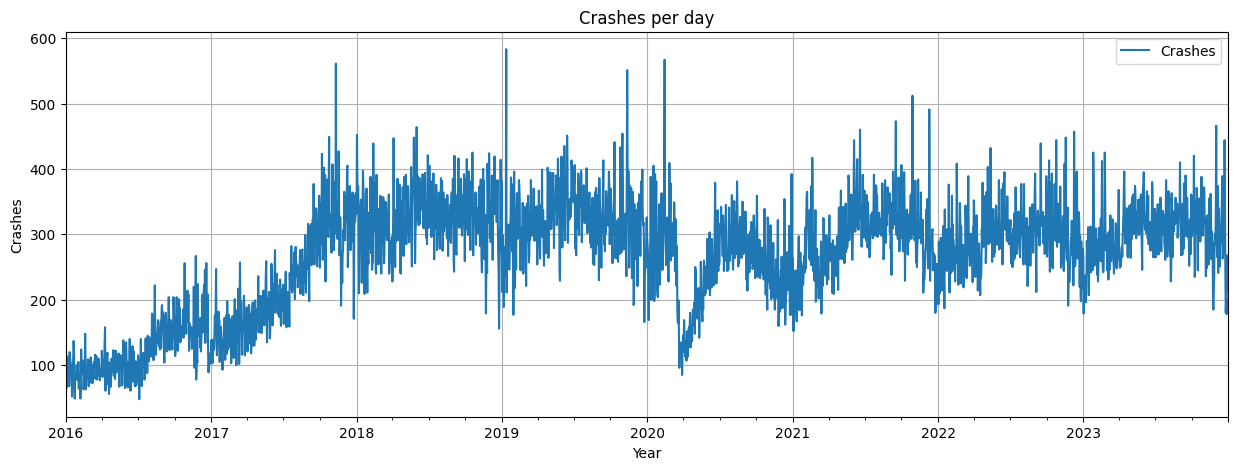

In [49]:
crashes_c = pd.DataFrame(data['CRASH_DATE'])
crashes_c['CRASH_DATE'] = pd.to_datetime(crashes_c['CRASH_DATE'], errors='coerce')
crashes = crashes_c.groupby(crashes_c['CRASH_DATE'].dt.date).size()
crashes.index= pd.to_datetime(crashes.index)
crashes = crashes.reset_index()
crashes = crashes.set_index('CRASH_DATE')
crashes=crashes.rename(columns = {0:'COUNT'})
plot = crashes.plot(y='COUNT', figsize=(15, 5))
plot.set_xlabel("Year")
plot.set_ylabel("Crashes")
plot.set_title("Crashes per day")
plot.legend(["Crashes"])
plot.grid()

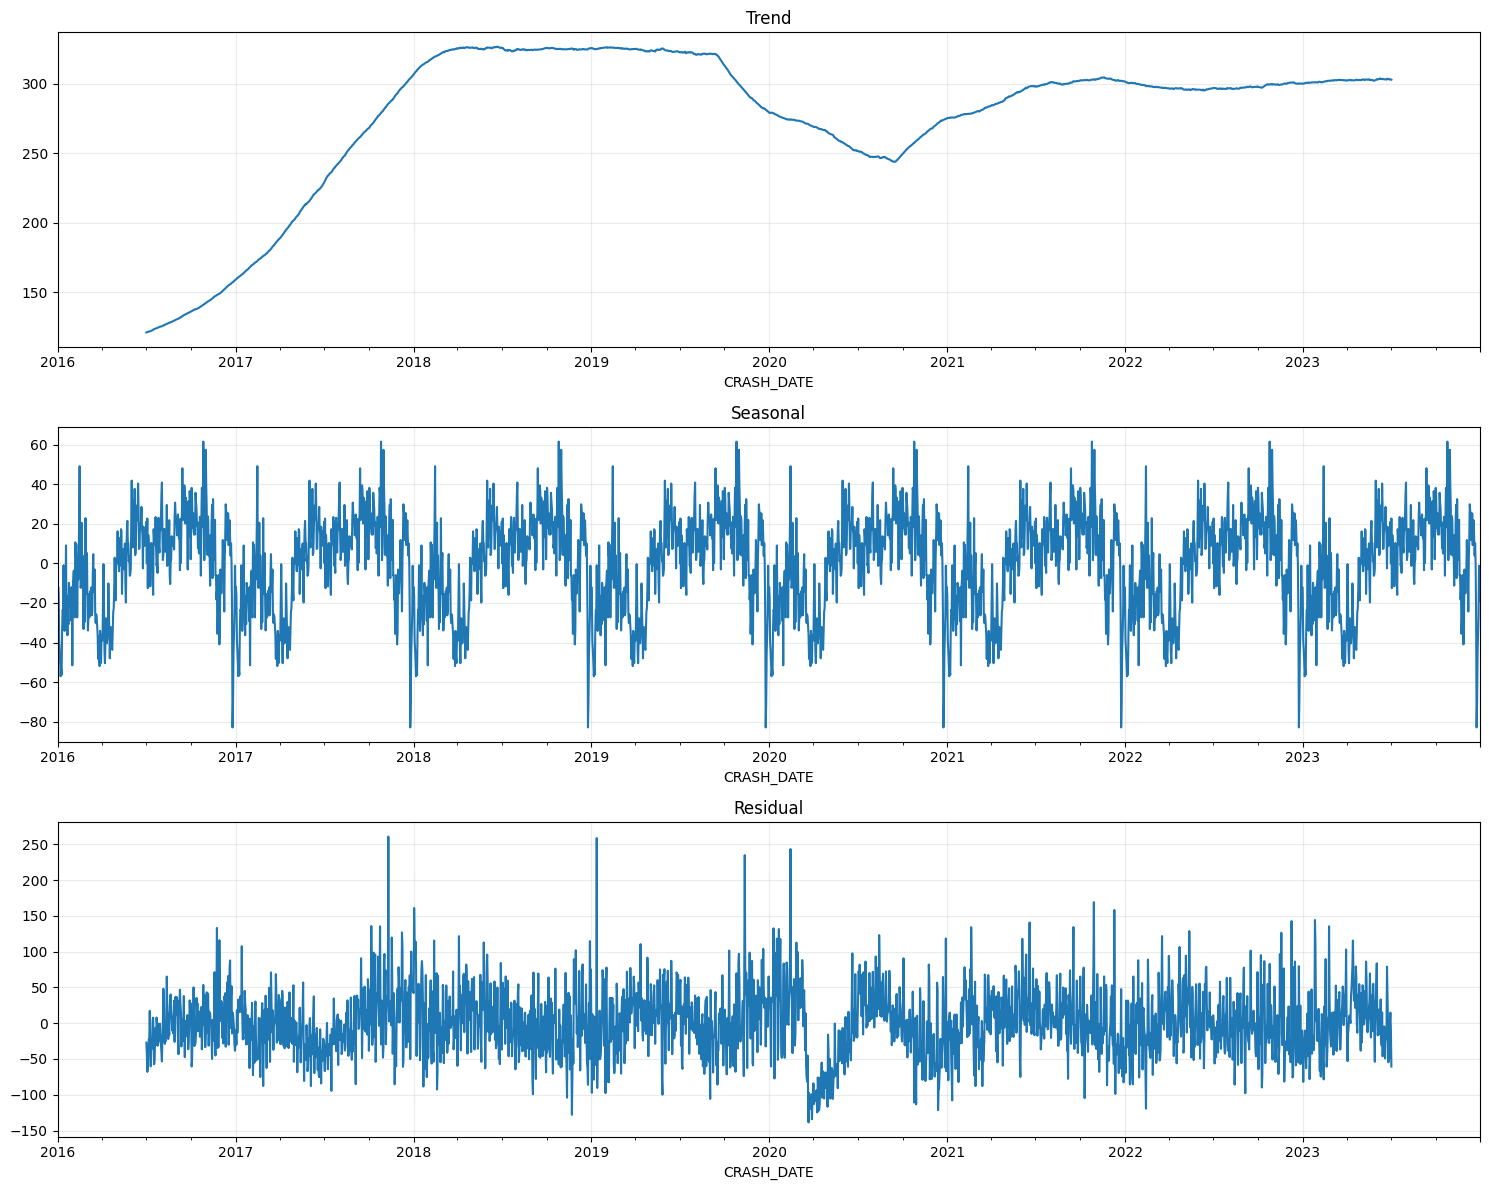

In [51]:
decom = seasonal_decompose(crashes, model = 'additive', period = 365)

fig,(ax1,ax2,ax3) = plt.subplots(3,1, figsize = (15,12))
decom.trend.plot(ax=ax1)
ax1.set_title("Trend")
ax1.grid(alpha = 0.25)
decom.seasonal.plot(ax=ax2)
ax2.set_title("Seasonal")
ax2.grid(alpha = 0.25)
decom.resid.plot(ax=ax3)
ax3.set_title("Residual")
ax3.grid(alpha = 0.25)
plt.tight_layout()

# EXPLAIN 

# WEATHER

In [56]:
weather = data['WEATHER_CONDITION'].value_counts()
print(weather)

WEATHER_CONDITION
CLEAR                       617127
RAIN                         68701
UNKNOWN                      42469
SNOW                         26580
CLOUDY/OVERCAST              23160
OTHER                         2436
FREEZING RAIN/DRIZZLE         1449
FOG/SMOKE/HAZE                1207
SLEET/HAIL                     926
BLOWING SNOW                   403
SEVERE CROSS WIND GATE         146
BLOWING SAND, SOIL, DIRT         7
Name: count, dtype: int64


Text(0.5, 1.0, 'Number of accidents per weather condition')

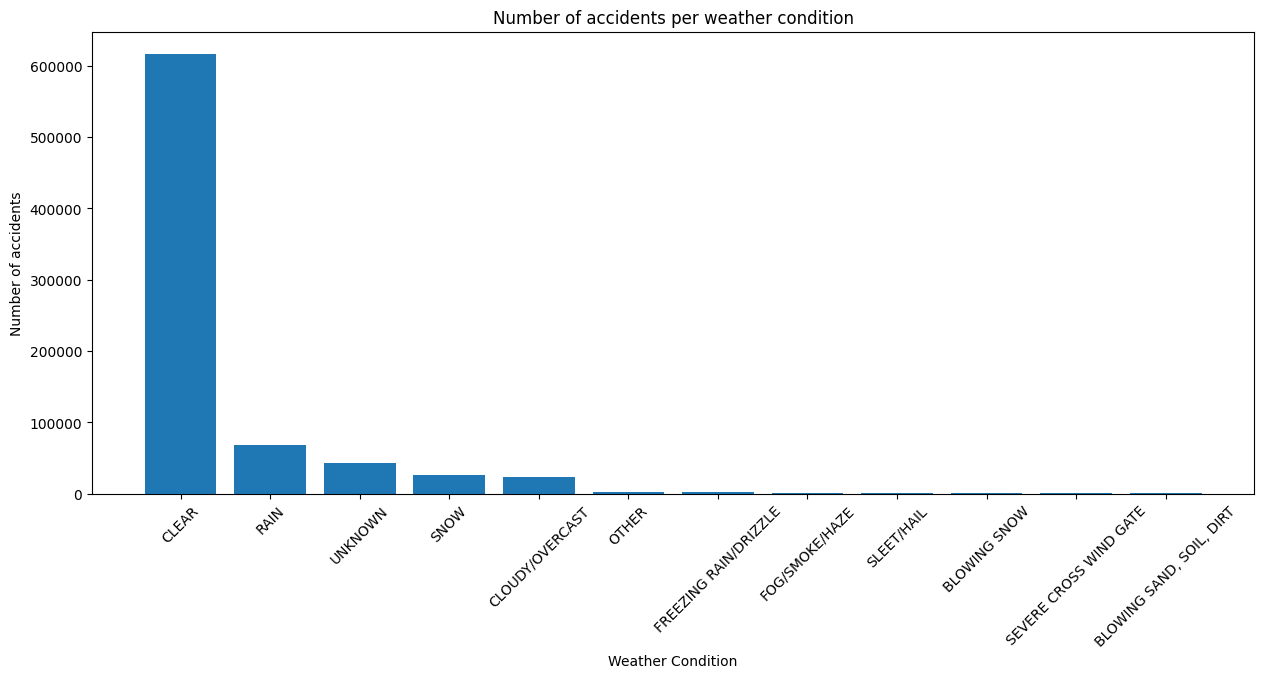

In [58]:
plt.figure(figsize = (15,6))
plt.bar(weather.index,weather.values)
plt.xticks(rotation=45)
plt.xlabel('Weather Condition')
plt.ylabel('Number of accidents')
plt.title('Number of accidents per weather condition')


# EXPLAIN

C:\Users\byash\AppData\Local\Temp\ipykernel_128388\134117291.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(weather_grouped['WEATHER_CONDITION'], rotation=45, ha='right')
C:\Users\byash\AppData\Local\Temp\ipykernel_128388\134117291.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(weather_grouped['WEATHER_CONDITION'], rotation=45, ha='right')


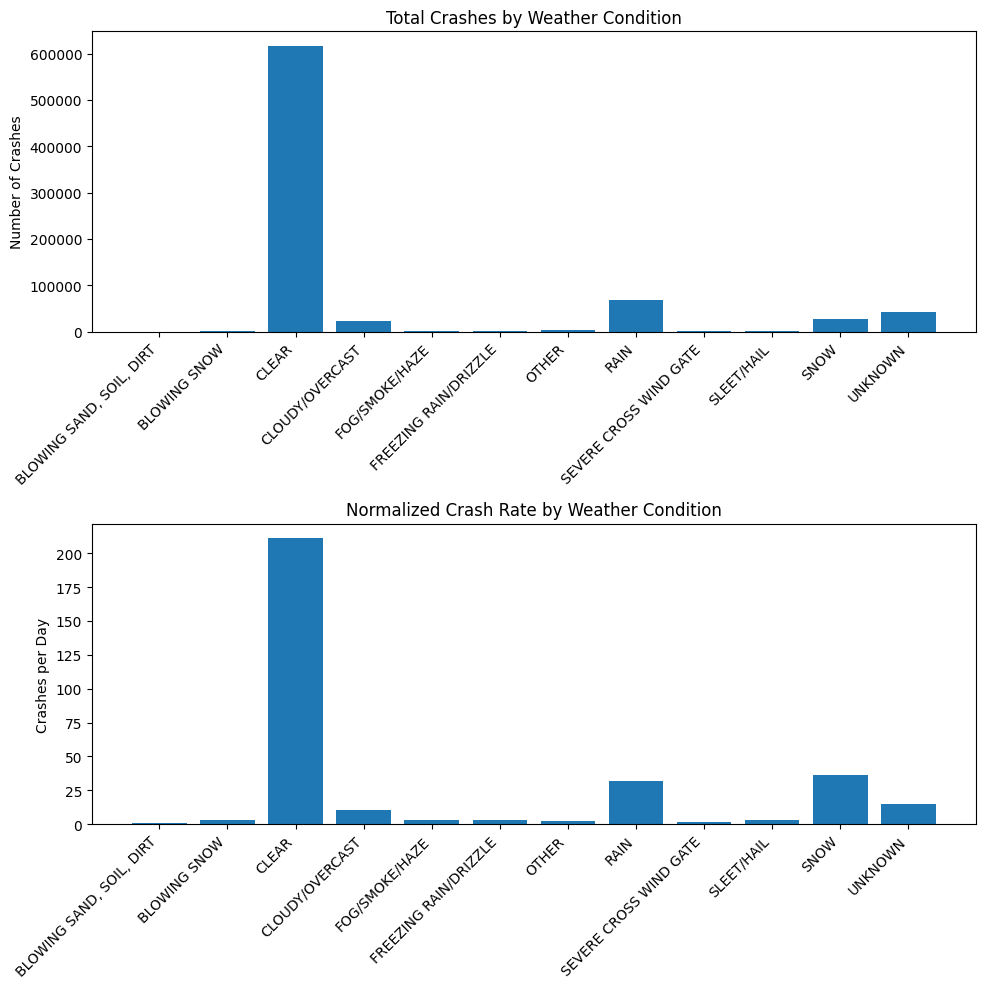

In [107]:
# Ensure CRASH_DATE is a datetime column
data['CRASH_DATE'] = pd.to_datetime(data['CRASH_DATE'], errors='coerce')

# Extract only the date
data['CRASH_DATE_ONLY'] = data['CRASH_DATE'].dt.date

# Group by WEATHER_CONDITION
weather_grouped = data.groupby('WEATHER_CONDITION').agg(
    accidents_count=('CRASH_RECORD_ID', 'count'),  # Count of crashes
    days_of_weather=('CRASH_DATE_ONLY', 'nunique')  # Unique crash days
).reset_index()

# Calculate normalized rate
weather_grouped['normalized_rate'] = (
    weather_grouped['accidents_count'] / weather_grouped['days_of_weather']
)

# Visualize
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Total crashes by weather condition
ax[0].bar(weather_grouped['WEATHER_CONDITION'], weather_grouped['accidents_count'])
ax[0].set_title('Total Crashes by Weather Condition')
ax[0].set_ylabel('Number of Crashes')
ax[0].set_xticklabels(weather_grouped['WEATHER_CONDITION'], rotation=45, ha='right')

# Normalized crash rates
ax[1].bar(weather_grouped['WEATHER_CONDITION'], weather_grouped['normalized_rate'])
ax[1].set_title('Normalized Crash Rate by Weather Condition')
ax[1].set_ylabel('Crashes per Day')
ax[1].set_xticklabels(weather_grouped['WEATHER_CONDITION'], rotation=45, ha='right')

plt.tight_layout()
plt.show()


       CRASH_DATE WEATHER_CONDITION  days_of_weather  accidents count
23431  2023-12-31             CLEAR             2922           617127
23565  2023-12-31              RAIN             2162            68701
23535  2023-12-31              SNOW              735            26580
23315  2023-12-31              SNOW              735            26580
23545  2023-12-31           UNKNOWN             2917            42469
...           ...               ...              ...              ...
485825 2016-01-01             CLEAR             2922           617127
629461 2016-01-01             CLEAR             2922           617127
463025 2016-01-01             CLEAR             2922           617127
771695 2016-01-01             CLEAR             2922           617127
68414  2016-01-01             CLEAR             2922           617127

[784611 rows x 4 columns]


In [105]:
weather_norm['normalized_rate'] = weather_norm['accidents count'] / weather_norm['days_of_weather']
show = weather_norm.groupby('WEATHER_CONDITION')['normalized_rate'].unique()
show

WEATHER_CONDITION
BLOWING SAND, SOIL, DIRT                   [1.0]
BLOWING SNOW                [3.0763358778625953]
CLEAR                       [211.20020533880904]
CLOUDY/OVERCAST              [10.36241610738255]
FOG/SMOKE/HAZE              [3.0326633165829144]
FREEZING RAIN/DRIZZLE       [3.1161290322580646]
OTHER                         [2.00990099009901]
RAIN                         [31.77659574468085]
SEVERE CROSS WIND GATE      [1.7380952380952381]
SLEET/HAIL                   [2.967948717948718]
SNOW                         [36.16326530612245]
UNKNOWN                     [14.559136098731573]
Name: normalized_rate, dtype: object

# Explain

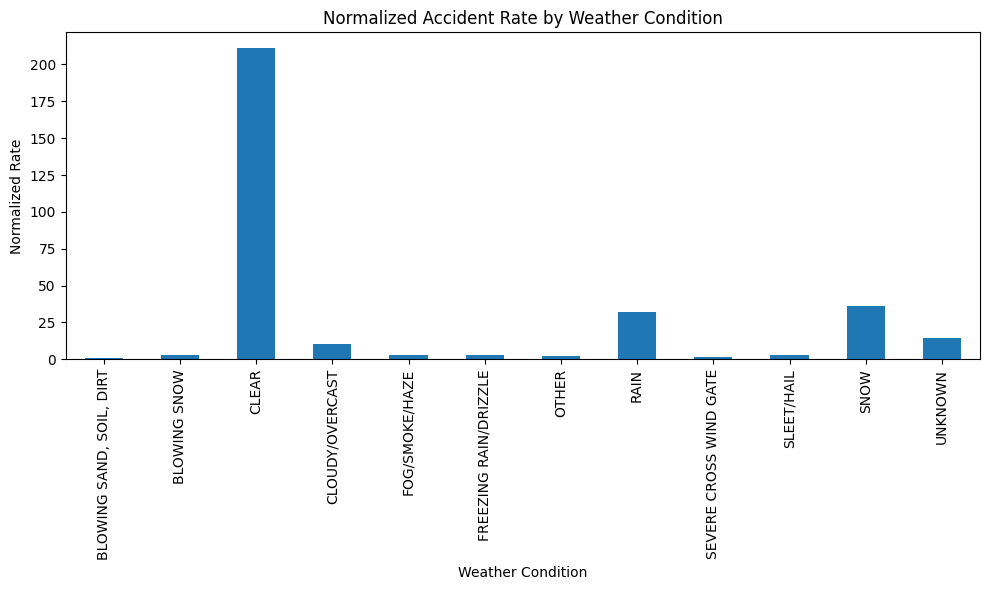

       WEATHER_CONDITION  days_of_weather  accidents count
0                  CLEAR             2922           617127
1                  CLEAR             2922           617127
2                  CLEAR             2922           617127
3                  CLEAR             2922           617127
4                  CLEAR             2922           617127
...                  ...              ...              ...
784606             CLEAR             2922           617127
784607           UNKNOWN             2917            42469
784608             CLEAR             2922           617127
784609             CLEAR             2922           617127
784610             CLEAR             2922           617127

[784611 rows x 3 columns]


# EXPLAIN

In [68]:
lighting = data['LIGHTING_CONDITION'].value_counts()
lighting

LIGHTING_CONDITION
DAYLIGHT                  503729
DARKNESS, LIGHTED ROAD    172662
DARKNESS                   37275
UNKNOWN                    35204
DUSK                       22589
DAWN                       13152
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of accidents per lighting condition')

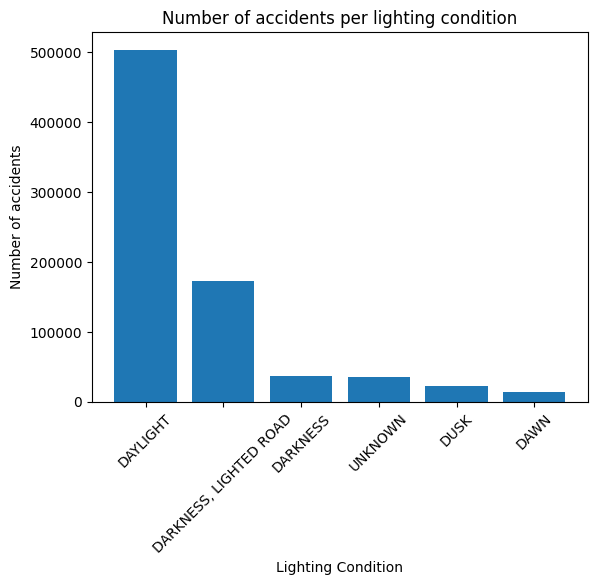

In [69]:
plt.Figure(figsize = (15,6))
plt.area
plt.xticks(rotation=45)
plt.xlabel('Lighting Condition')
plt.ylabel('Number of accidents')
plt.title('Number of accidents per lighting condition')


C:\Users\byash\AppData\Local\Temp\ipykernel_128388\1911257719.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar['CRASH_DATE'] = bar['CRASH_DATE'].dt.date


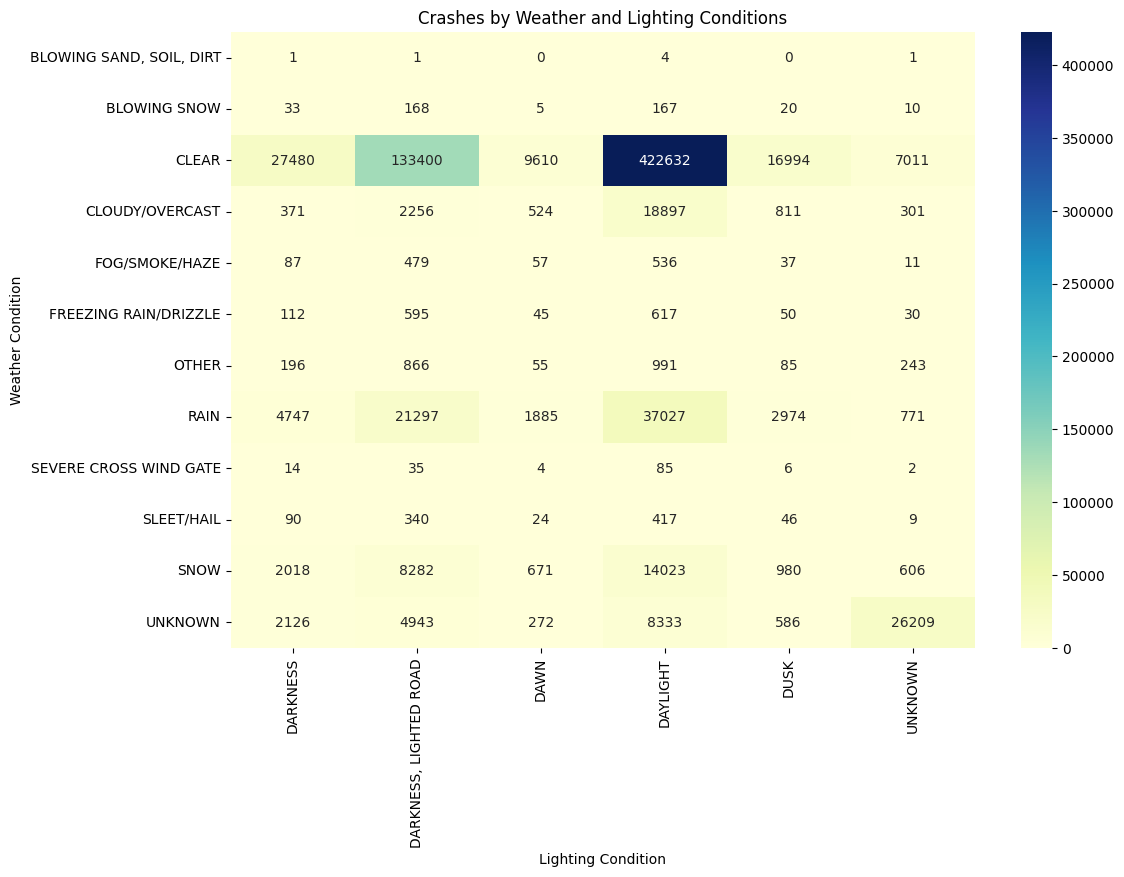

In [119]:
import seaborn as sns
bar = data[['WEATHER_CONDITION', 'LIGHTING_CONDITION', 'CRASH_DATE']]
bar['CRASH_DATE'] = bar['CRASH_DATE'].dt.date


# Create a pivot table
heatmap_data = data.pivot_table(index='WEATHER_CONDITION', columns='LIGHTING_CONDITION', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Crashes by Weather and Lighting Conditions')
plt.xlabel('Lighting Condition')
plt.ylabel('Weather Condition')
plt.show()


# EXPLAIN

## STREET CRASHES AT DIFFERENT  LIGHTING

In [122]:
data.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

In [136]:
street = data[['STREET_NAME', 'STREET_NO', 'CRASH_DATE', 'LONGITUDE', 'LATITUDE']]
street.head()

,STREET_NAME,STREET_NO,CRASH_DATE,LONGITUDE,LATITUDE
0,WENTWORTH AVE,5500,2023-09-05 19:05:00,0.000000,0.00000
1,CHICAGO SKYWAY OB,7900,2023-09-22 18:45:00,0.000000,0.00000
2,ASHLAND AVE,2101,2023-07-29 14:45:00,-87.665902,41.85412
3,BALMORAL AVE,10020,2023-08-09 23:00:00,0.000000,0.00000
4,OHARE ST,700,2023-08-18 12:50:00,0.000000,0.00000


In [ ]:
street = street[~((street['LATITUDE'] == 0) & (street['LONGITUDE'] == 0))]
street.reset_index(drop=True, inplace=True)

In [141]:
street

,STREET_NAME,STREET_NO,CRASH_DATE,LONGITUDE,LATITUDE
0,ASHLAND AVE,2101,2023-07-29 14:45:00,-87.665902,41.854120
1,47TH ST,1320,2023-07-29 14:30:00,-87.594213,41.809781
2,CALIFORNIA AVE,999,2023-07-29 00:50:00,-87.696642,41.899225
3,FOSTER AVE,3210,2023-08-13 10:10:00,-87.709134,41.975853
4,LAFAYETTE AVE,7458,2023-08-09 19:55:00,-87.626522,41.758246
...,...,...,...,...,...
779224,BELDEN AVE,1110,2023-11-06 07:00:00,-87.656457,41.923618
779225,STONY ISLAND AVE,9500,2023-10-31 18:30:00,-87.585276,41.722257
779226,104TH ST,44,2023-11-04 23:00:00,-87.621737,41.705477
779227,63RD ST,5115,2023-11-06 18:35:00,-87.750264,41.778165


In [144]:
data.describe()

,CRASH_DATE,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,784611,784611.000000,7.846110e+05,784611.000000,784611.000000,784611.000000,784611.00000,784611.000000,784611.000000,784611.000000,784611.000000,784611.000000,784611.0,784611.000000,784611.000000,784611.000000,784611.000000,784611.000000
mean,2020-05-10 15:30:45.201023232,28.410045,3.352428e+00,3691.102471,1243.716155,2.035326,0.19041,0.001204,0.020154,0.107735,0.061317,1.999335,0.0,13.199840,4.122787,6.745269,41.570234,-87.077456
min,2016-01-01 00:01:00,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,2018-07-29 05:00:00,30.000000,0.000000e+00,1252.000000,714.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.780393,-87.721478
50%,2020-04-23 14:30:00,30.000000,0.000000e+00,3201.000000,1211.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874274,-87.673659
75%,2022-03-25 07:46:30,30.000000,0.000000e+00,5600.000000,1822.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924209,-87.632717
max,2023-12-31 23:50:00,70.000000,1.191625e+06,451100.000000,6100.000000,18.000000,21.00000,4.000000,10.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000
std,NaN,6.116664,1.491551e+03,2887.638498,705.090741,0.454330,0.56684,0.037610,0.166121,0.423349,0.318663,1.163019,0.0,5.573935,1.980950,3.396460,3.455860,7.237018
